In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [2]:
data = pd.read_csv('data/World_Bank_mobile_data.csv')
# data.head()

In [3]:
data.rename(columns = {"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+) [FX.OWN.TOTL.MA.ZS]": "Males_15plus", 
                       "Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+) [FX.OWN.TOTL.40.ZS]": "poorest40perc_15plus", 
                       "Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+) [FX.OWN.TOTL.ZS]": "pop_15plus",
                       "Account ownership at a financial institution or with a mobile-money-service provider, richest 60% (% of population ages 15+) [FX.OWN.TOTL.60.ZS]":"richest60perc_15plus",
                       "Automated teller machines (ATMs) (per 100,000 adults) [FB.ATM.TOTL.P5]":"ATM_per100K",  
                        "Account ownership at a financial institution or with a mobile-money-service provider, young adults (% of population ages 15-24) [FX.OWN.TOTL.YG.ZS]": "young_adults_15-24",
                        "Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+) [FX.OWN.TOTL.FE.ZS]": "Females_15plus",
                        "Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+) [FX.OWN.TOTL.OL.ZS]": "older_adults_25plus",
                        "Account ownership at a financial institution or with a mobile-money-service provider, primary education or less (% of population ages 15+) [FX.OWN.TOTL.PL.ZS]": "primaryed_or_less",
                        "Account ownership at a financial institution or with a mobile-money-service provider, secondary education or more (% of population ages 15+) [FX.OWN.TOTL.SO.ZS]": "secondaryed_or_more",
                        "Mobile cellular subscriptions [IT.CEL.SETS]": "mobile_subscr",
                        "Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]": "mobile_subscr_per100",
                        "Country Name":"Country",
                        "Time": "Year"},
                        inplace=True)

In [4]:
#work with temporary dataframe to narrow down countries based on available data
data2 = data[['Country', 'ATM_per100K', 'Year']].copy()
# data2.info() # 13200 rows

In [5]:
#remove rows with no ATM data
data2 = data2[data2.ATM_per100K != '..']
data2['ATM_per100K'] = data2['ATM_per100K'].astype(float)
# data2.info() #3350 rows

In [6]:
country_counts = data2.value_counts("Country")
country = np.array(country_counts == 16) #boolean indexes
unique_countries = data2['Country'].unique()[:-1] #removed the 'nan' row in 'Country' column
countries = list(unique_countries[country]) #boolean index where country value counts == 16
#len(countries) #narrows the countries to consider from 234 to 122
list(countries)

['Albania',
 'American Samoa',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Estonia',
 'Gambia, The',
 'Georgia',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Honduras',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Lithuania',
 'Luxembourg',
 'Macao SAR, China',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Mauritius',
 'Mexico',
 'Micronesia, F

In [7]:
df = data[data['Country'].isin(countries)]
df = df.drop(['Time Code'], axis=1)
df = df.replace(to_replace = '..', value=np.nan, regex=False)

In [8]:
df['Year'] = df['Year'].astype(int)
df['Males_15plus'] = df['Males_15plus'].astype(float)
df['poorest40perc_15plus'] = df['poorest40perc_15plus'].astype(float)
df['pop_15plus'] = df['pop_15plus'].astype(float)
df['richest60perc_15plus'] = df['richest60perc_15plus'].astype(float)
df['young_adults_15-24'] = df['young_adults_15-24'].astype(float)
df['Females_15plus'] = df['Females_15plus'].astype(float)
df['older_adults_25plus'] = df['older_adults_25plus'].astype(float)
df['primaryed_or_less'] = df['primaryed_or_less'].astype(float)
df['secondaryed_or_more'] = df['secondaryed_or_more'].astype(float)
df['mobile_subscr'] = df['mobile_subscr'].astype(float)
df['mobile_subscr_per100'] = df['mobile_subscr_per100'].astype(float)
df['ATM_per100K'] = df['ATM_per100K'].astype(float)

In [9]:
df[['ATM_per100K', 'Year']].describe()

,ATM_per100K,Year
count,1828.000000,6100.000000
mean,50.003385,1995.500000
std,43.040125,14.432053
min,0.011971,1971.000000
25%,17.592992,1983.000000
50%,42.740684,1995.500000
75%,67.555358,2008.000000
max,324.170505,2020.000000


In [10]:
df.dropna(subset=['ATM_per100K'], inplace = True)
df[['ATM_per100K', 'Year']].describe() #6100 --> 1828 rows; Year range (min 2014, max 2019)
df.info()

,ATM_per100K,Year
count,1828.000000,1828.000000
mean,50.003385,2011.864333
std,43.040125,4.513336
min,0.011971,2004.000000
25%,17.592992,2008.000000
50%,42.740684,2012.000000
75%,67.555358,2016.000000
max,324.170505,2019.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 265 to 4433
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1828 non-null   int64  
 1   Country               1828 non-null   object 
 2   Country Code          1828 non-null   object 
 3   Males_15plus          273 non-null    float64
 4   poorest40perc_15plus  269 non-null    float64
 5   pop_15plus            273 non-null    float64
 6   richest60perc_15plus  269 non-null    float64
 7   young_adults_15-24    273 non-null    float64
 8   Females_15plus        273 non-null    float64
 9   older_adults_25plus   273 non-null    float64
 10  primaryed_or_less     273 non-null    float64
 11  secondaryed_or_more   273 non-null    float64
 12  mobile_subscr         1754 non-null   float64
 13  mobile_subscr_per100  1754 non-null   float64
 14  ATM_per100K           1828 non-null   float64
dtypes: float64(12), int

In [11]:
# df = df[df.poorest40perc_15plus.notnull()] #filtered to remove null valus 1952 --> 269
# len(df) #269

In [12]:
df[['Country', 'Year', 'ATM_per100K']].groupby(['Country', 'Year']).agg(['max', 'min'])

ATM_per100K           
                     max        min
Country Year                       
Albania 2004    4.227499   4.227499
        2005    9.261702   9.261702
        2006   13.873349  13.873349
        2007   19.365691  19.365691
        2008   28.629452  28.629452
...                  ...        ...
Vanuatu 2015   40.558374  40.558374
        2016   41.159281  41.159281
        2017   49.268421  49.268421
        2018   48.050330  48.050330
        2019   47.879170  47.879170

[1828 rows x 2 columns]

In [13]:
df = df.sort_values(by=(['Country', 'Year']))
df = df.reset_index()

In [19]:
# df['rate'] = df['ATM_per100K'].diff(1)
df['rate'] = df.sort_values(['Country','Year']).groupby('Country')['ATM_per100K'].pct_change()
df.head(50)

,index,Year,Country,Country Code,Males_15plus,poorest40perc_15plus,pop_15plus,richest60perc_15plus,young_adults_15-24,Females_15plus,older_adults_25plus,primaryed_or_less,secondaryed_or_more,mobile_subscr,mobile_subscr_per100,ATM_per100K,rate
0,4225,2004,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259590.0,40.567917,4.227499,NaN
1,3961,2005,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1530244.0,49.573638,9.261702,1.190823
2,3697,2006,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909885.0,62.352984,13.873349,0.497927
3,3433,2007,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2322436.0,76.547051,19.365691,0.395892
4,3169,2008,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859632.0,61.932448,28.629452,0.478359
5,2905,2009,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2463741.0,82.869197,32.940815,0.150592
6,2641,2010,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2692372.0,91.328053,34.131657,0.036151
7,2377,2011,Albania,ALB,33.664677,17.518583,28.268126,35.411152,26.403656,22.672611,28.729259,15.061747,36.244446,3100000.0,105.852915,35.285166,0.033796
8,2113,2012,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3500000.0,120.105858,35.737533,0.012820
9,1849,2013,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3685983.0,126.936969,35.427446,-0.008677


In [44]:
len(df.Country.unique())

122

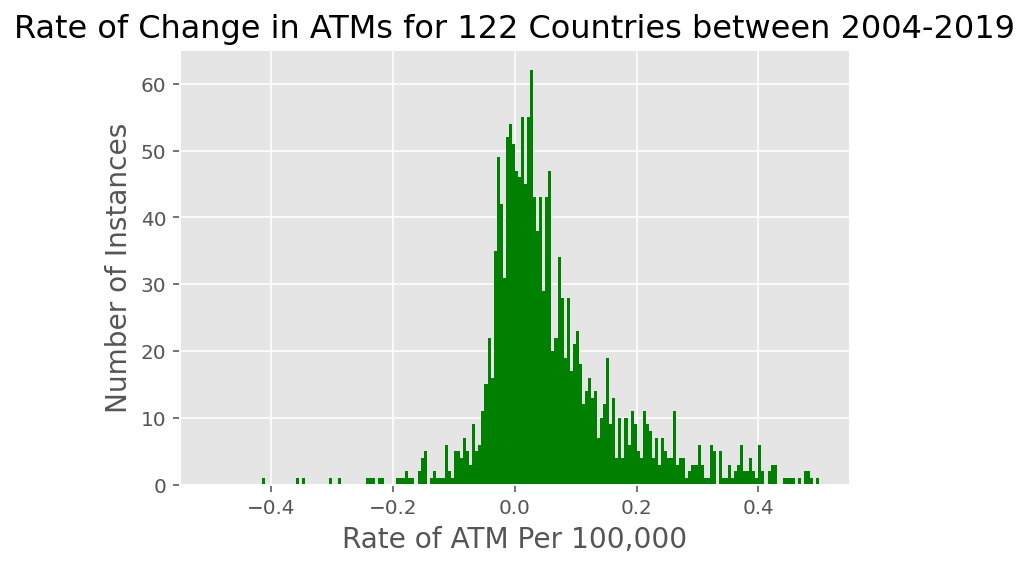

In [108]:
x = df['rate']
_ = plt.hist(x, 200, range=[-.5, 0.5], facecolor='green', align='mid')
_ = plt.xlabel('Rate of ATM Per 100,000', fontsize=14)
_ = plt.ylabel('Number of Instances', fontsize=14)
_ = plt.title("Rate of Change in ATMs for 122 Countries between 2004-2019", fontsize=16)
plt.show()


In [114]:
most_change = df[(df.rate >.3) & (df.Year > 2014) & (df.rate < 10)].sort_values(by='rate', ascending=False) #Looking for the countries that are increasing ATM availability in recent years
most_change

,index,Year,Country,Country Code,Males_15plus,poorest40perc_15plus,pop_15plus,richest60perc_15plus,young_adults_15-24,Females_15plus,older_adults_25plus,primaryed_or_less,secondaryed_or_more,mobile_subscr,mobile_subscr_per100,ATM_per100K,rate
1324,1474,2015,Peru,PER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.423581e+07,112.356368,123.099198,1.169743
1808,1264,2016,Uzbekistan,UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.326539e+07,73.995208,21.721646,1.077140
1692,985,2017,Timor-Leste,TLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.556624e+06,125.205227,11.993800,0.943483
886,370,2019,Kuwait,KWT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.327028e+06,174.159340,138.402110,0.889312
1169,927,2017,Myanmar,MMR,26.007711,22.543983,25.992298,28.291044,11.26261,25.978712,30.841911,23.606537,30.486254,4.794666e+07,89.817158,4.378875,0.645196
1703,722,2018,Togo,TGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.144507e+06,77.886102,6.136328,0.540258
348,1361,2015,China,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.291984e+09,91.835388,77.132701,0.401046
1116,395,2019,Mongolia,MNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.418919e+06,137.013649,148.798923,0.392173
1811,472,2019,Uzbekistan,UZB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.338000e+07,101.207590,38.489919,0.372896
1570,442,2019,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.665243,0.370352


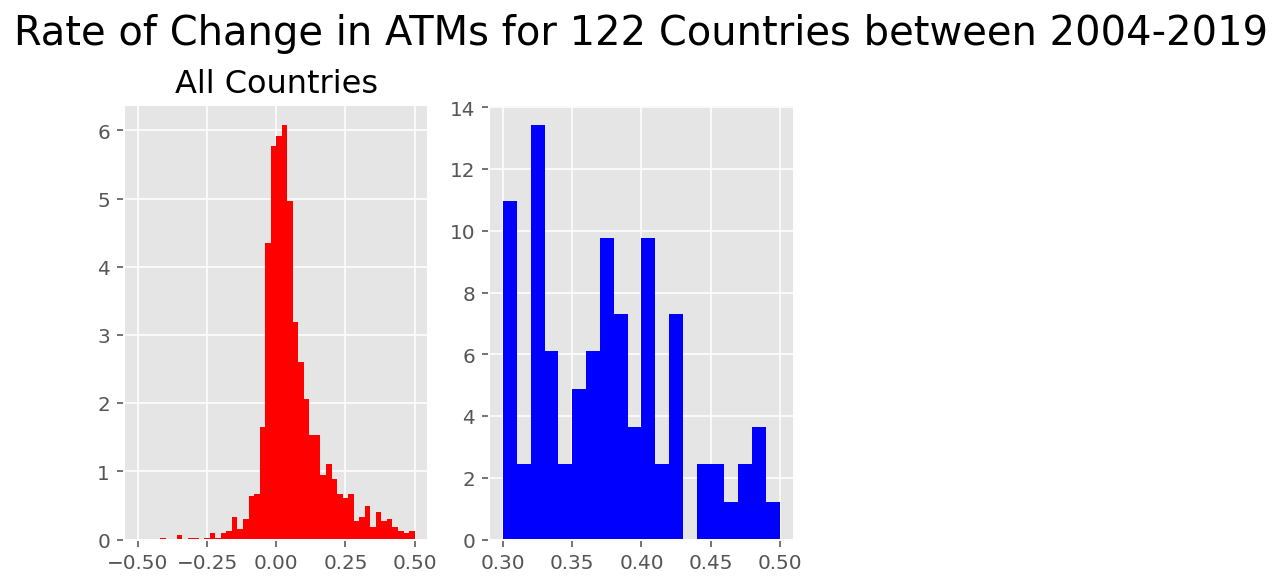

In [73]:
n_bins = 50

fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1,  = axes.flatten()

colors = ['red', 'tan', 'lime']
x_all = df['rate']
_ = ax0.hist(x_all, n_bins, density=True, histtype='bar', range=[-.5, 0.5], color='red', label='red')
# ax0.legend(prop={'size': 10})
_ = ax0.set_title("All Countries", fontsize=16)

x_right = df[df.rate >.3]['rate']
_ = ax1.hist(x_right, bins=20, density=True, histtype='bar', range=[.3, 0.5], color = 'blue', label='green')
_ = ax1.set_title("Greater than .3 percent growth",loc = 'center', fontsize=16)

# _ = fig.tight_layout()
_ = plt.title("Rate of Change in ATMs for 122 Countries between 2004-2019", pad = 30.0, fontsize=20)
plt.show()

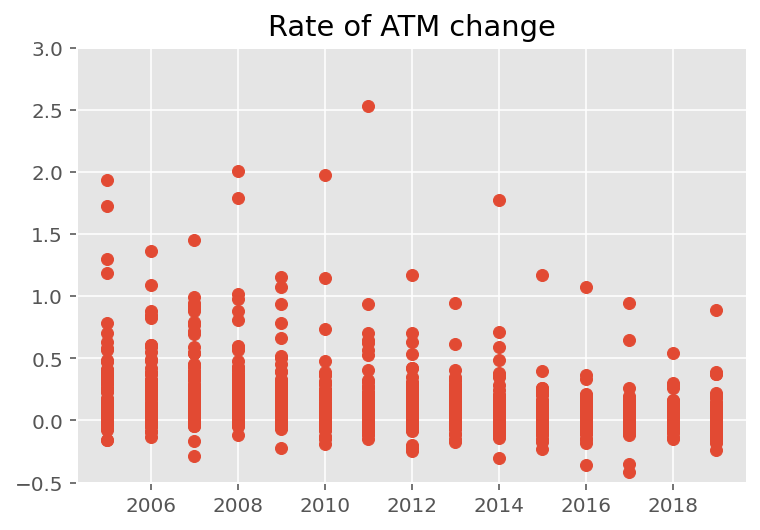

In [126]:
_ = plt.scatter(x = df['Year'], y = df['rate'])
_ = plt.ylim([-.5, 3])
_ = plt.title("Rate of ATM change")
plt.show()